<a href="https://colab.research.google.com/github/elva4012/Case-Study/blob/master/Case_Study_HR_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retention Study-Figuring Out Which Employees May Quit**

Loading HR database

In [2]:
import pandas as pd

#Uncomment this line if using this notebook locally
#hr_df=pd.read_csv('./data/employee_retention/hr_data.csv')

In [3]:
file_name="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_df=pd.read_csv(file_name)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
# review the bottom rows
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [6]:
# View which colums are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [7]:
# Display values in categorical coumns
print(hr_df['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [8]:
print(hr_df['salary'].unique())

['low' 'medium' 'high']


In [9]:
# How many rows in the dataset?
len(hr_df)

14999

In [10]:
# What about columns?
len(hr_df.columns)

9

In [11]:
# or we can do
hr_df.shape

(14999, 9)

## **Loading our Evaluation and employee satisfaction data**

In [12]:
# Let's load the data

file_name="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"

emp_satis_eval=pd.read_excel(file_name)
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


# Merge or Join Tables

In [13]:
main_df=hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df=main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


## **Is our dataset good? are there any missing value?**

In [14]:
# let's check on the missing value

main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


So what we do for those missing values?
we can eirther
*   filling in the missing value
*   droping the missing value if it's not necessary


## Let's fill in the missing blanks with the aveage values


In [15]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [17]:
# let's search the employee_id=3794, here is tow ways to search this employee

main_df[main_df.employee_id==3794]


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [18]:
#or
main_df.loc[main_df['employee_id']==3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [19]:
# Removing employee ID from dataset

main_df_final=main_df.drop(columns='employee_id')

main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
# What is in salary?

main_df_final['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [21]:
# Let's see details in differnt department, very intresting we can see which department has most left employee? 

main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [22]:
# we can also look the groupby department by their average mean.

main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


Therefore, depend on the dataset we got in above, we want to know which empolyee may leave the company

In [23]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

0 means employee stay

1 means employee left

## **Displaying the correlation Matrix**

In [24]:
main_df_final.corr()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
number_project,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.143895,0.348776
average_montly_hours,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.020886,0.339014
time_spend_company,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.101165,0.131078
Work_accident,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.059063,-0.006779
left,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.388282,0.006876
promotion_last_5years,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.025925,-0.007815
satisfaction_level,-0.143895,-0.020886,-0.101165,0.059063,-0.388282,0.025925,1.000000,0.103783
last_evaluation,0.348776,0.339014,0.131078,-0.006779,0.006876,-0.007815,0.103783,1.000000


In [25]:
%matplotlib inline
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


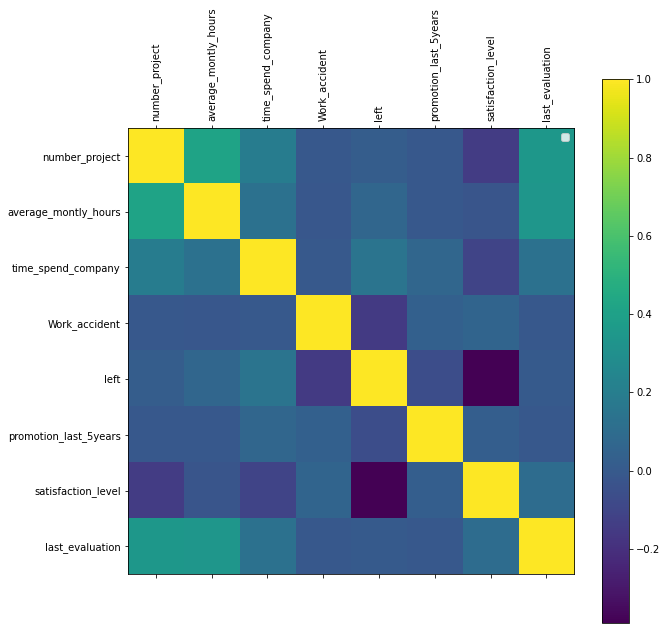

In [26]:
def plot_corr(df,size=10):
  '''Function Plots a graphical correlation matrix for each pair of colums in the dataframe.

  Input:
  df:pandas DataFrame
  size: vertical and horizontal size of the plot'''

  corr=df.corr()
  fig, ax=plt.subplots(figsize=(size,size))
  ax.legend()
  cax= ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(main_df_final)

In above correlation Matrix, we can see the left has strong correlation with the_spend_company, that means the empoyee who spend more time in the company has high level to leave.

# **Preparing out Dataset for ML**

In [27]:
# Perfore one hot encoding on categoritcal data

categoritcal=['department','salary']
main_df_final=pd.get_dummies(main_df_final,columns=categoritcal, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [28]:
# How many employee in the dataset have left?
len(main_df_final.loc[main_df_final['left']==1])

3571

In [29]:
# How many columns do we have now?
len(main_df_final.columns)

19

In [30]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

# we remove the label values from our training data
X=main_df_final.drop(['left'], axis=1).values

#we assigned those label value to our Y dataset
y=main_df_final['left'].values

In [32]:
# split it to a 70:30 ratio train test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [33]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [34]:
df_train=pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.655622,0.475953,-1.026407,-0.409223,-0.148322,1.432791,-1.258674,-0.236247,-0.235121,-0.228275,-0.206653,-0.246848,-0.254573,-0.614966,2.396476,-0.470965,-0.970064,1.144335
1,-0.655622,-0.960737,0.334058,-0.409223,-0.148322,1.513037,1.373166,-0.236247,-0.235121,-0.228275,-0.206653,4.051083,-0.254573,-0.614966,-0.417279,-0.470965,-0.970064,-0.873870
2,0.153045,-1.020599,-1.026407,-0.409223,-0.148322,0.550082,1.431652,-0.236247,-0.235121,-0.228275,-0.206653,-0.246848,3.928150,-0.614966,-0.417279,-0.470965,1.030860,-0.873870
3,0.153045,-0.541703,-0.346174,-0.409223,-0.148322,0.028481,-1.317159,-0.236247,-0.235121,-0.228275,-0.206653,-0.246848,-0.254573,-0.614966,-0.417279,2.123298,-0.970064,1.144335
4,-0.655622,-1.858668,1.014291,-0.409223,-0.148322,-0.372750,-1.434130,-0.236247,-0.235121,-0.228275,4.839037,-0.246848,-0.254573,-0.614966,-0.417279,-0.470965,-0.970064,1.144335


In [35]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,3.707864e-16,-2.648187e-16,-1.513071e-15,-3.640292e-16,6.389889e-16,3.667172e-14,2.354755e-14,-5.758112e-16,-6.088409e-16,5.770009e-16,-3.072703e-16,-2.405448e-16,4.034829e-16,-1.395440e-15,4.495457e-16,-1.163720e-15,-1.369405e-15,-4.215654e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.464288e+00,-2.098116e+00,-1.026407e+00,-4.092231e-01,-1.483220e-01,-2.098045e+00,-2.077469e+00,-2.362468e-01,-2.351211e-01,-2.282749e-01,-2.066527e-01,-2.468475e-01,-2.545728e-01,-6.149661e-01,-4.172794e-01,-4.709654e-01,-9.700640e-01,-8.738699e-01
25%,-6.556215e-01,-9.008749e-01,-3.461742e-01,-4.092231e-01,-1.483220e-01,-6.937355e-01,-9.077620e-01,-2.362468e-01,-2.351211e-01,-2.282749e-01,-2.066527e-01,-2.468475e-01,-2.545728e-01,-6.149661e-01,-4.172794e-01,-4.709654e-01,-9.700640e-01,-8.738699e-01
50%,1.530451e-01,-2.289799e-02,-3.461742e-01,-4.092231e-01,-1.483220e-01,1.087273e-01,2.800343e-02,-2.362468e-01,-2.351211e-01,-2.282749e-01,-2.066527e-01,-2.468475e-01,-2.545728e-01,-6.149661e-01,-4.172794e-01,-4.709654e-01,-9.700640e-01,-8.738699e-01
75%,9.617117e-01,8.750329e-01,3.340585e-01,-4.092231e-01,-1.483220e-01,8.309437e-01,9.052835e-01,-2.362468e-01,-2.351211e-01,-2.282749e-01,-2.066527e-01,-2.468475e-01,-2.545728e-01,1.626106e+00,-4.172794e-01,-4.709654e-01,1.030860e+00,1.144335e+00
max,2.579045e+00,2.172044e+00,4.415455e+00,2.443655e+00,6.742088e+00,1.553160e+00,1.665593e+00,4.232862e+00,4.253127e+00,4.380683e+00,4.839037e+00,4.051083e+00,3.928150e+00,1.626106e+00,2.396476e+00,2.123298e+00,1.030860e+00,1.144335e+00


## **Let's train a logistic Regression Model**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [38]:
model= LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions=model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(classification_report(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy 79.13%
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3442
           1       0.60      0.35      0.44      1058

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3442
           1       0.60      0.35      0.44      1058

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



# **Let's try a Random Forest Classifer**
to see if we can get better results

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model= RandomForestClassifier()
model.fit(X_train, y_train)

predictions=model.predict(X_test)
score=model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(classification_report(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy 98.76%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3442
           1       0.99      0.96      0.97      1058

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3442
           1       0.99      0.96      0.97      1058

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



# **Deep Learning**

can deep learning make a difference?

In [42]:
# use the newest version_of TensorFlow 2

%tensorflow_version 2.x

In [43]:
import tensorflow.keras
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

In [44]:
model=Sequential()

model.add(Dense(9, kernel_initializer="uniform", activation="relu", input_dim=18))
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

model.compile(optimizer= "adam", loss= "binary_crossentropy", metrics=['accuracy'])

In [45]:
# Display model summary and show parameters

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [46]:
# start training our classfier
batch_size=10
epochs=10

history= model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_test, y_test))

score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.5476 - accuracy: 0.7575 - val_loss: 0.3408 - val_accuracy: 0.8482
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3165 - accuracy: 0.8559 - val_loss: 0.2776 - val_accuracy: 0.8724
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2636 - accuracy: 0.8807 - val_loss: 0.2516 - val_accuracy: 0.9024
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2425 - accuracy: 0.9128 - val_loss: 0.2399 - val_accuracy: 0.9180
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2389 - accuracy: 0.9252 - val_loss: 0.2336 - val_accuracy: 0.9262
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2197 - accuracy: 0.9334 - val_loss: 0.2268 - val_accuracy: 0.9276
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1972 - accuracy: 0.9409 - val_loss: 0.2234 - val_accuracy:

In [47]:
# Plotting lost charts
import matplotlib.pyplot as plt


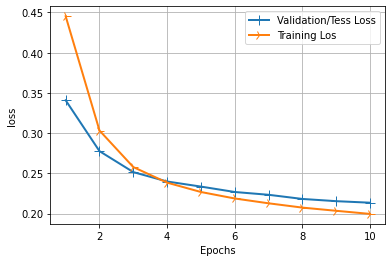

In [48]:
history_dict= history.history

loss_values=history_dict['loss']
val_loss_value=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)

line1=plt.plot(epochs, val_loss_value, label='Validation/Tess Loss')
line2=plt.plot(epochs, loss_values, label='Training Los')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

## **Displaying the Classification Report and Confusion Matrix**

In [49]:
predictions= model.predict(X_test)
predictions=(predictions >0.5)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[3304  138]
 [ 137  921]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3442
           1       0.87      0.87      0.87      1058

    accuracy                           0.94      4500
   macro avg       0.91      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500



## **Let's a Deeper Model**

In [50]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout


In [51]:
model2=Sequential()

#Hidden Layer 1
model2.add(Dense(100, activation='relu', input_dim=18, kernel_constraint=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer 2
model2.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))


model2.add(Dense(1, activation='sigmoid'))


In [52]:
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1900      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


In [53]:
model2.compile(loss='binary_crossantropy', optimizer='adam', metrics=['accuracy'])

# **Training our Deeper Model**

In [ ]:
batch_size=10
epochs=25

history=model2.fit(X_train, 
                   y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_test, y_test))

score=model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1] )